In [7]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import dateutil.parser

In [8]:
# dictionary of text dates and links (May 2020 to August 2020)

# May 1, 2020
url1 = 'https://www.reuters.com/article/us-health-coronavirus-amazon-com-idUSKBN22D4TK'

# May 4, 2020 
url2 = 'https://www.reuters.com/article/us-health-coronavirus-amazon-france-ware-idUSKBN22G2FE'

# May 7, 2020

url3 = 'https://www.reuters.com/article/us-health-coronavirus-nasdaq-graphic/stay-at-home-stocks-amazon-microsoft-lift-nasdaq-into-gain-for-2020-idUSKBN22J2YU'

# May 13, 2020
url4 = 'https://www.reuters.com/article/us-amazon-fire-idUSKBN22P29N'

# May 21, 2020

url5 = 'https://www.reuters.com/article/us-amazon-com-prime-day-idUSKBN22X1PE'

# May 26, 2020
url6 = 'https://www.reuters.com/article/us-zoox-m-a-amazon-com-idUSKBN23302F'


# May 28, 2020
url7 = 'https://www.reuters.com/article/us-health-coronavirus-amazon-com-workers-idUSKBN2341FD'

# June 3, 2020
url8 = 'https://in.reuters.com/article/us-health-coronavirus-amazon-com-lawsuit/amazon-is-sued-over-warehouses-after-new-york-worker-brings-coronavirus-home-cousin-dies-idINKBN23A3FI'

# June 17, 2020
url9 = 'https://www.reuters.com/article/us-amazon-com-saudi-arabia-idUSKBN23O3AO'

# June 23, 2020
url10 = 'https://www.reuters.com/article/us-amazon-com-clean-energy-idUSKBN23U1OP'

# June 26, 2020
url11 = 'https://www.reuters.com/article/us-zoox-m-a-amazon-com-idUSKBN23X0PI'

# June 28, 2020
url12 = 'https://www.reuters.com/article/us-amazon-germany-strike-idUSKBN23Z0RC'

# July 8, 2020
url13 = 'https://www.reuters.com/article/us-amazon-com-india-idUSKBN2490U9'

#July 10, 2020
url14 = 'https://www.reuters.com/article/us-amazon-com-delivery-idUSKBN24B2EJ'

# July 15, 2020
url15 = 'https://www.reuters.com/article/us-health-coronavirus-amazon-com-workers-idUSKCN24G2TM'

# July 23, 2020
url16 = 'https://www.reuters.com/article/us-reliance-amazon-com-stake-idUSKCN24O1BP'

# July 30, 2020
url17 = 'https://www.reuters.com/article/us-amazon-com-results-idUSKCN24V3HL'

# August 4, 2020
url18 = 'https://www.reuters.com/article/us-amazon-com-sweden-idUSKCN2501OA'

# August 14, 2020
url19 ='https://www.reuters.com/article/us-amazon-com-liability/california-court-rules-amazon-is-liable-for-injuries-from-defective-products-idUKKCN259327'

# August 17, 2020
url20 = 'https://www.reuters.com/article/amazoncom-rackspace-tech-idUSL1N2FG1JC'

# August 28, 2020
url21 = 'https://www.reuters.com/article/us-amazon-com-daimler-electric-vehicles-idUSKBN25O0TC'



url_dict = {'2020-05-01':url1,
            '2020-05-04':url2,
            '2020-05-07':url3,
            '2020-05-13':url4,
            '2020-05-21':url5,
            '2020-05-26':url6,
            '2020-05-28':url7,
            '2020-06-03':url8,
            '2020-06-17':url9,
            '2020-06-23':url10,
            '2020-06-26':url11,
            '2020-06-08':url12,
            '2020-07-08':url13,
            '2020-07-10':url14,
            '2020-07-15':url15,
            '2020-07-23':url16,
            '2020-07-30':url17,
            '2020-08-04':url18,
            '2020-08-14':url19,
            '2020-08-17':url20,
            '2020-08-28':url21,
           }


In [9]:
# extract info from each website and store it in dataframe
df_text = pd.DataFrame(columns = ['Date','Header','Text'])
header = []
text = []
date = []
for key in url_dict:
    page = requests.get(url_dict[key]).text
    soup = BeautifulSoup(page, 'html.parser')
    date.append(datetime.strptime(key, '%Y-%m-%d').date())
    url_header = soup.find('h1').text
    header.append(url_header)
    url_text = soup.find('div', class_ ='ArticleBodyWrapper')
    url_text = url_text.text
    text.append(url_text)
df_text['Date']=date
df_text['Header']=header
df_text['Text']=text

# remove the author and "min read" sections
df_text_temp = [] 
for text in df_text['Text']:
    loc = text.find('(Reuters)')
    df_text_temp.append(text[loc+9:])
df_text['Text'] = df_text_temp




In [10]:
df_text['Date'] = df_text['Date'].apply(lambda x: pd.to_datetime(x))
df_text.head()

,Date,Header,Text
0,2020-05-01,Amazon extends work from home regime till Octo...,- Amazon.com Inc has told staff whose job can...
1,2020-05-04,Amazon plans to extend closure of French wareh...,- Amazon AMZN.O plans to extend the closure o...
2,2020-05-07,"Stay-at-home stocks Amazon, Microsoft lift Nas...",- The Nasdaq .IXIC was on track to end Thursd...
3,2020-05-13,Amazon launches three new models of Fire tablet,- Amazon.com Inc on Wednesday launched three ...
4,2020-05-21,Amazon pushes Prime Day to September as it ret...,- Amazon.com Inc is scheduling its annual Pri...


In [11]:
# import stock data of netflix
df_stock = pd.read_csv('AMZN.csv', header=0)

df_stock['Date']=df_stock['Date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))


df_stock = df_stock.drop(['High','Low','Close','Adj Close'], axis=1)
df_stock.head()

,Date,Open,Volume
0,2019-11-29,1817.780029,1923400
1,2019-12-02,1804.400024,3925600
2,2019-12-03,1760.000000,3380900
3,2019-12-04,1774.010010,2670100
4,2019-12-05,1763.500000,2823800


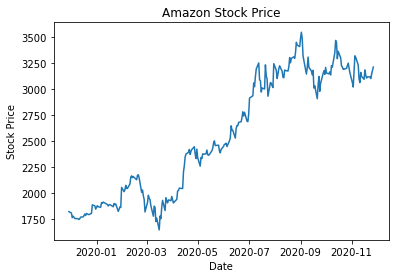

In [20]:
plt.figure()
plt.plot(df_stock['Date'], df_stock['Open'])
plt.title('Amazon Stock Price')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show()

In [13]:
# Merge two dataframes
df = pd.merge(df_text, df_stock, how='inner', on='Date')
df = df.sort_values('Date')

In [14]:
# show % change in stock price after news article publish
pct_stock = df['Open'].pct_change()*100
df['% Change in Stock Price'] = pct_stock
pct_volume = df['Volume'].pct_change()*100
df['% Change in Volume'] = pct_volume
df.head()

,Date,Header,Text,Open,Volume,% Change in Stock Price,% Change in Volume
0,2020-05-01,Amazon extends work from home regime till Octo...,- Amazon.com Inc has told staff whose job can...,2336.800049,9772600,NaN,NaN
1,2020-05-04,Amazon plans to extend closure of French wareh...,- Amazon AMZN.O plans to extend the closure o...,2256.379883,4865900,-3.441465,-50.208747
2,2020-05-07,"Stay-at-home stocks Amazon, Microsoft lift Nas...",- The Nasdaq .IXIC was on track to end Thursd...,2374.780029,3396400,5.247350,-30.199963
3,2020-05-13,Amazon launches three new models of Fire tablet,- Amazon.com Inc on Wednesday launched three ...,2366.800049,4782900,-0.336030,40.822636
4,2020-05-21,Amazon pushes Prime Day to September as it ret...,- Amazon.com Inc is scheduling its annual Pri...,2500.000000,5114400,5.627850,6.930941


# Processing the text


## import spacy libraries
import spacy
import en_core_web_sm
from  spacy.lang.en.stop_words import STOP_WORDS
nlp = spacy.load('en_core_web_sm')

In [15]:
# import spacy libraries
import spacy
import en_core_web_sm
from  spacy.lang.en.stop_words import STOP_WORDS
nlp = spacy.load('en_core_web_sm')

In [16]:

text_nlp = nlp(df['Text'][1]) 
# Remove stop words
text_nlp_clean = [word for word in text_nlp if word.is_stop == False]
# Lemmatize words
text_nlp_clean = [word.lemma_ for word in text_nlp_clean]

In [17]:
text_clean = []
for ind, row in df.iterrows():
    
    # lower casing
    text_lower = row['Text'].lower()
    
    # tokenization
    text_nlp = nlp(row['Text']) 
    
    # remove punctuation and empty space
    text_nlp_clean = [word for word in text_nlp if not word.is_punct | word.is_space]
    
    # Remove stop words
    text_nlp_clean = [word for word in text_nlp_clean if word.is_stop == False]
    
    # Lemmatize tokens
    text_nlp_clean = [word.lemma_ for word in text_nlp_clean]
    
    # add preprocessed text to list
    text_clean.append(text_nlp_clean)

# turn list of strings to string
to_string = []
for text in text_clean:
    to_string.append(' '.join(text))


df['Text (clean)'] = to_string
df.head()

,Date,Header,Text,Open,Volume,% Change in Stock Price,% Change in Volume,Text (clean)
0,2020-05-01,Amazon extends work from home regime till Octo...,- Amazon.com Inc has told staff whose job can...,2336.800049,9772600,NaN,NaN,Amazon.com Inc tell staff job home October 2 p...
1,2020-05-04,Amazon plans to extend closure of French wareh...,- Amazon AMZN.O plans to extend the closure o...,2256.379883,4865900,-3.441465,-50.208747,Amazon AMZN.O plan extend closure french wareh...
2,2020-05-07,"Stay-at-home stocks Amazon, Microsoft lift Nas...",- The Nasdaq .IXIC was on track to end Thursd...,2374.780029,3396400,5.247350,-30.199963,Nasdaq .IXIC track end Thursday positive terri...
3,2020-05-13,Amazon launches three new models of Fire tablet,- Amazon.com Inc on Wednesday launched three ...,2366.800049,4782900,-0.336030,40.822636,Amazon.com Inc Wednesday launch new version Fi...
4,2020-05-21,Amazon pushes Prime Day to September as it ret...,- Amazon.com Inc is scheduling its annual Pri...,2500.000000,5114400,5.627850,6.930941,Amazon.com Inc schedule annual Prime Day shopp...


# Using a Pretrained Model 

In [18]:
from nltk.sentiment import SentimentIntensityAnalyzer

In [79]:
# a function to return sentiment score
def polarity_score(text):
    sid = SentimentIntensityAnalyzer()
    return sid.polarity_scores(text)['compound']

vader_score = []
for text in df['Text (clean)']:
    score = polarity_score(text)
    vader_score.append(score)

df['Vader Sentiment Score'] = vader_score

In [80]:
df.head()

,Date,Header,Text,Open,Volume,% Change in Stock Price,% Change in Volume,Vader Sentiment Score,sentiment,sentiment_prob,Text (clean)
0,2020-05-01,Amazon extends work from home regime till Octo...,- Amazon.com Inc has told staff whose job can...,2336.800049,9772600,NaN,NaN,0.9337,0.0,0.261833,Amazon.com Inc tell staff job home October 2 p...
1,2020-05-04,Amazon plans to extend closure of French wareh...,- Amazon AMZN.O plans to extend the closure o...,2256.379883,4865900,-3.441465,-50.208747,0.5106,0.0,0.328385,Amazon AMZN.O plan extend closure french wareh...
2,2020-05-07,"Stay-at-home stocks Amazon, Microsoft lift Nas...",- The Nasdaq .IXIC was on track to end Thursd...,2374.780029,3396400,5.247350,-30.199963,0.9423,0.0,0.010354,Nasdaq .IXIC track end Thursday positive terri...
3,2020-05-13,Amazon launches three new models of Fire tablet,- Amazon.com Inc on Wednesday launched three ...,2366.800049,4782900,-0.336030,40.822636,-0.6249,1.0,0.950189,Amazon.com Inc Wednesday launch new version Fi...
4,2020-05-21,Amazon pushes Prime Day to September as it ret...,- Amazon.com Inc is scheduling its annual Pri...,2500.000000,5114400,5.627850,6.930941,0.9524,1.0,0.851752,Amazon.com Inc schedule annual Prime Day shopp...


## Sentiment Analysis

In [81]:
# run this cell to import nltk
import nltk
from os import getcwd
import numpy as np
import pandas as pd
from nltk.corpus import twitter_samples 
from utils import process_tweet, build_freqs

In [82]:
nltk.download('twitter_samples')
nltk.download('stopwords')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\aashi\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aashi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [83]:

# select the set of positive and negative tweets
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

In [84]:
# split the data into two pieces (80-20), one for training and one for testing (validation set)  
test_pos = all_positive_tweets[4000:]
train_pos = all_positive_tweets[:4000]
test_neg = all_negative_tweets[4000:]
train_neg = all_negative_tweets[:4000]

train_x = train_pos + train_neg 
test_x = test_pos + test_neg

In [85]:
# combine positive and negative labels
train_y = np.append(np.ones((len(train_pos), 1)), np.zeros((len(train_neg), 1)), axis=0)
test_y = np.append(np.ones((len(test_pos), 1)), np.zeros((len(test_neg), 1)), axis=0)

In [86]:
# Print the shape train and test sets
print("train_y.shape = " + str(train_y.shape))
print("test_y.shape = " + str(test_y.shape))

train_y.shape = (8000, 1)
test_y.shape = (2000, 1)


In [87]:
# create frequency dictionary
freqs = build_freqs(train_x, train_y)

# check the output
print("type(freqs) = " + str(type(freqs)))
print("len(freqs) = " + str(len(freqs.keys())))

type(freqs) = <class 'dict'>
len(freqs) = 11340


In [88]:
# UNQ_C3 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
def extract_features(tweet, freqs):
    '''
    Input: 
        tweet: a list of words for one tweet
        freqs: a dictionary corresponding to the frequencies of each tuple (word, label)
    Output: 
        x: a feature vector of dimension (1,3)
    '''
    # process_tweet tokenizes, stems, and removes stopwords
    word_l = process_tweet(tweet)
    
    # 3 elements in the form of a 1 x 3 vector
    x = np.zeros((1, 3)) 
    
    #bias term is set to 1
    x[0,0] = 1 
    
    ### START CODE HERE (REPLACE INSTANCES OF 'None' with your code) ###
    
    # loop through each word in the list of words
    for word in word_l:
        
        # increment the word count for the positive label 1
        
        x[0,1] += freqs.get((word,1),0)
        
        # increment the word count for the negative label 0
        x[0,2] += freqs.get((word,0),0)
        
    ### END CODE HERE ###
    assert(x.shape == (1, 3))
    return x

In [89]:
# collect the features 'x' and stack them into a matrix 'X'
X = np.zeros((len(train_x), 3))
for i in range(len(train_x)):
    X[i, :]= extract_features(train_x[i], freqs)

# training labels corresponding to X
Y = train_y

In [90]:
Y.shape

(8000, 1)

### SVM Parameters

In [93]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X, Y)

C:\Users\aashi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression(random_state=0)

In [94]:

# UNQ_C4 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
def predict_tweet(tweet, freqs):
    '''
    Input: 
        tweet: a string
        freqs: a dictionary corresponding to the frequencies of each tuple (word, label)
        theta: (3,1) vector of weights
    Output: 
        y_pred: the probability of a tweet being positive or negative
    '''
    ### START CODE HERE (REPLACE INSTANCES OF 'None' with your code) ###
    
    # extract the features of the tweet and store it into x
    x = extract_features(tweet,freqs)
    
    # make the prediction using x and theta
    y_pred = classifier.predict(x)
    
    ### END CODE HERE ###
    
    return y_pred

In [95]:
# UNQ_C4 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
def predict_tweet_prob(tweet, freqs):
    '''
    Input: 
        tweet: a string
        freqs: a dictionary corresponding to the frequencies of each tuple (word, label)
        theta: (3,1) vector of weights
    Output: 
        y_pred: the probability of a tweet being positive or negative
    '''
    ### START CODE HERE (REPLACE INSTANCES OF 'None' with your code) ###
    
    # extract the features of the tweet and store it into x
    x = extract_features(tweet,freqs)
    
    # make the prediction using x and theta
    y_pred = classifier.predict_proba(x)
    
    ### END CODE HERE ###
    
    return y_pred

In [96]:

my_tweet = 'The plot was terrible and I was sad until the ending!'
predict_tweet(my_tweet, freqs)

array([0.])

# Testing the Model 

In [97]:
sentiment = []
sentiment_prob = []
for i in df.iloc[:,2]:
    sentiment.append(predict_tweet(i, freqs)[0])
    sentiment_prob.append(predict_tweet_prob(i, freqs)[0][1])

In [98]:
sentiment


[0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0]

In [99]:
sentiment_prob

[0.2618334729233748,
 0.3283845668965124,
 0.010354060284476043,
 0.9501886573386169,
 0.8517521081724347,
 0.3177180775673144,
 0.06554527083311634,
 0.37026363135100254,
 0.10566910926686277,
 0.1596126856899722,
 0.6530352304432109,
 0.23712903226583337,
 0.4442002321771298,
 0.9973827253034953,
 0.6817719672477593,
 0.21893120340366418,
 0.05467648128576027,
 0.3938074246666394,
 0.5345745391228767,
 0.055011028720492045,
 0.49952737084212323]

In [100]:
df['sentiment'] = sentiment
df['sentiment_prob'] = sentiment_prob
df

,Date,Header,Text,Open,Volume,% Change in Stock Price,% Change in Volume,Vader Sentiment Score,sentiment,sentiment_prob,Text (clean)
0,2020-05-01,Amazon extends work from home regime till Octo...,- Amazon.com Inc has told staff whose job can...,2336.800049,9772600,NaN,NaN,0.9337,0.0,0.261833,Amazon.com Inc tell staff job home October 2 p...
1,2020-05-04,Amazon plans to extend closure of French wareh...,- Amazon AMZN.O plans to extend the closure o...,2256.379883,4865900,-3.441465,-50.208747,0.5106,0.0,0.328385,Amazon AMZN.O plan extend closure french wareh...
2,2020-05-07,"Stay-at-home stocks Amazon, Microsoft lift Nas...",- The Nasdaq .IXIC was on track to end Thursd...,2374.780029,3396400,5.247350,-30.199963,0.9423,0.0,0.010354,Nasdaq .IXIC track end Thursday positive terri...
3,2020-05-13,Amazon launches three new models of Fire tablet,- Amazon.com Inc on Wednesday launched three ...,2366.800049,4782900,-0.336030,40.822636,-0.6249,1.0,0.950189,Amazon.com Inc Wednesday launch new version Fi...
4,2020-05-21,Amazon pushes Prime Day to September as it ret...,- Amazon.com Inc is scheduling its annual Pri...,2500.000000,5114400,5.627850,6.930941,0.9524,1.0,0.851752,Amazon.com Inc schedule annual Prime Day shopp...
5,2020-05-26,Amazon in advanced talks to buy self-driving s...,- Amazon.com Inc AMZN.O is in advanced talks ...,2458.000000,3568200,-1.680000,-30.232285,0.9468,0.0,0.317718,Amazon.com Inc AMZN.O advanced talk buy self d...
6,2020-05-28,"Amazon to offer permanent roles to 70% of 175,...",- Amazon.com Inc AMZN.O plans to offer perman...,2384.330078,3190200,-2.997149,-10.593577,0.9613,0.0,0.065545,Amazon.com Inc AMZN.O plan offer permanent job...
7,2020-06-03,Amazon is sued over warehouses after New York ...,- Amazon.com Inc has been sued for allegedly ...,2468.010010,2671000,3.509578,-16.274842,0.5267,0.0,0.370264,Amazon.com Inc sue allegedly foster spread cor...
11,2020-06-08,Amazon workers in Germany to go on strike over...,- Workers at six Amazon sites in Germany will...,2500.199951,3970700,1.304287,48.659678,0.9648,0.0,0.105669,worker Amazon site Germany strike Monday prote...
8,2020-06-17,Amazon launches Saudi Arabia shopping site des...,- Amazon.com Inc on Wednesday launched a webs...,2647.500000,2951100,5.891531,-25.678092,0.8596,0.0,0.159613,Amazon.com Inc Wednesday launch website shoppe...
